In [2]:
import torch

## 문제 1: 기본적인 선형 회귀 모델
문제: PyTorch를 이용하여 간단한 선형 회귀 모델을 구축하고, 임의의 데이터셋을 사용하여 모델을 학습시켜 보세요. 데이터셋은 1차원 입력과 1차원 출력을 가지도록 생성합니다.

힌트:
- torch를 사용하여 데이터 생성
- torch.nn.Linear 모듈을 사용하여 선형 모델 정의
- 손실 함수로 torch.nn.MSELoss 사용
- 옵티마이저로 torch.optim.SGD 사용

torch.Size([100, 2]) torch.Size([100, 1]) torch.Size([10, 2]) torch.Size([10, 1])
Done...


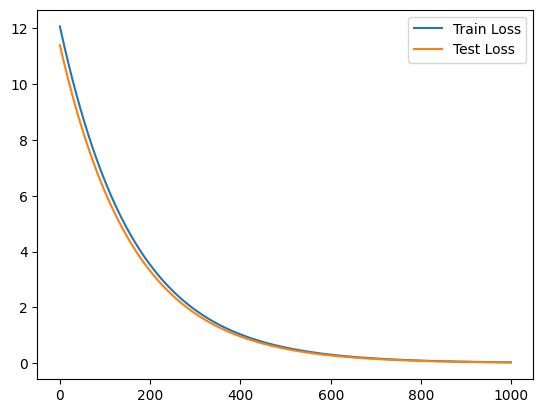

In [73]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

# Define model
class MyModel(nn.Module):
    def __init__(self, D):
        super().__init__()
        self.fc = nn.Linear(D, 1)
        
    def forward(self, x):
        # x: torch.Size([N1, D])
        return self.fc(x)

# Load data
N1, N2, D = 100, 10, 2
fx = lambda x: (2*x + 1).sum(dim=1).view(-1,1)
X1 = torch.rand(N1, D)
y1 = fx(X1)
X2 = torch.rand(N2, D)
y2 = fx(X2)
print(X1.shape, y1.shape, X2.shape, y2.shape)

model = MyModel(D)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
epochs = 1000
mse1_l = []
mse2_l = []
for _ in range(epochs):
    yp1 = model(X1) 
    mse = loss_fn(yp1, y1)
    mse1_l.append(mse)
    mse.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    with torch.no_grad():
        yp2 = model(X2)
        mse = loss_fn(yp2, y2)
        mse2_l.append(mse)
    
#print(mse_l)
mse1_l = [x.item() for x in mse1_l]
mse2_l = [x.item() for x in mse2_l]
plt.plot(mse1_l, label="Train Loss")
plt.plot(mse2_l, label="Test Loss")
plt.legend()
plt.plot()

print("Done...")

/root/.cache/pypoetry/virtualenvs/torchlab-uF8Em6gt-py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([100, 2])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/root/.cache/pypoetry/virtualenvs/torchlab-uF8Em6gt-py3.10/lib/python3.10/site-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([10, 2])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


[]

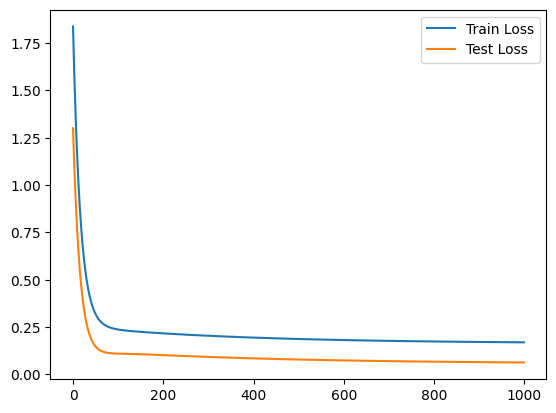